# FigureYa111markerGene_step2_win10

title: "FigureYa111markerGene_step2_linuxMAC"

author: "Zhougeng Xu, Taojun Ye"

reviewer: "Ying Ge"

date: "2025-5-20"

output: html_document

* Step1: 打开FigureYa111markerGene_step1.Rmd运行

* Step2：然后用Jupyter notebook打开FigureYa111markerGene_step2_win10.ipynb运行

*Step 1: Open FigureYa111markerGene_step1.Rmd and run

*Step 2: Then use Jupyter notebook to open FigureYa111markerGene_step2.linuxMAC.ipynb and run

## 环境设置

要求:

- 操作系统: Windows10
- 电脑内存: 最低8G， 推荐16G起步，上不封顶
- 掌握shell的基本使用方法

本文档以Windows10为例（内存64G)，运行环境是WSL。

linux和MAC系统请看FigureYa111markerGene_step2_linuxMAC.html

## Environment settings

Download and install the Anaconda distribution< https://www.anaconda.com/distribution/#download -section>， There is a Jupyter notebook inside, and for Linux and MAC systems, open FigureYa111markerGene_step2.linuxMAC.ipynb using the Jupyter notebook. Windows 10, please open FigureYa111markerGene_step2w_in10.ipynb Please refer to this article for the usage of ipynb files:< https://mp.weixin.qq.com/s/G-CQhNEJBmMRuDe2kxND_w >

### 观看安装视频

Windows10开启WSL的视频：<https://share.weiyun.com/56viiqa>

scanpy安装视频：<https://share.weiyun.com/5D8D0pN>

###Watch installation video
Video for Windows 10 to enable WSLs:< https://share.weiyun.com/56viiqa >
Scanpy installation video:< https://share.weiyun.com/5D8D0pN >

### 安装scanpy

打开WSL, 在<https://docs.conda.io/en/latest/miniconda.html>中复制miniconda的下载地址

###Install scanpy
Open WSI, in< https://docs.conda.io/en/latest/miniconda.html >Copy the download link of Minisonda in the middle

```bash
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
```

或者从清华镜像站下载

Or download from the Tsinghua mirror website

```bash
wget https://mirrors.tuna.tsinghua.edu.cn/anaconda/miniconda/Miniconda3-4.6.14-Linux-x86_64.sh
```

安装miniconda

Install Miniconda

```bash
bash Miniconda3-latest-Linux-x86_64.sh
```

重启终端后，就可以使用conda

添加国内镜像

After restarting the terminal, you can use conda
Add domestic image

```bash
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main/
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge/
conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/bioconda/
conda config --set show_channel_urls yes
```

然后用conda通过新建环境的方式安装scanpy

Then use conda to install scanpy by creating a new environment

```bash
conda create -n scanpy python=3.6 jupyter
```

调用scanpy环境

Call the scanpy environment

```bash
conda activate scanpy
```

在2019-6-23日前，通过conda安装的scanpy（1.4.3）无法兼容最新的scipy 1.3.0的后版本，因此从GitHub上安装最新版

Before June 23, 2019, scanpy (1.4.3) installed through conda was not compatible with the latest version after Scipy 1.3.0, so the latest version was installed from GitHub

```bash
pip install git+https://github.com/theislab/scanpy.git
```

之后，在命令行中输入`jupyter notebook`，在网页中调用jupyter，打开FigureYa111markerGene_step2_win10.ipynb

Then, enter 'jupyter notebook' on the command line, call jupyter on the web page, and open FigureYa111markerGene_sep2_win10.ipynb

![jupyter notebook](http://119.29.67.25:8888/images/2019/05/07/image.png)

复制链接在浏览器中打开

Copy the link and open it in the browser

![jupyter notebook](http://119.29.67.25:8888/images/2019/05/07/image511b02ae26329835.png)

# 加载环境

首先加载所需要的Python模块

#Loading environment

First, load the required Python modules

In [ ]:
from os.path import join
import scanpy as sc
import pandas as pd
from matplotlib import rcParams

然后设置一些环境参数，例如DPI，颜色设置
Then set some environmental parameters, such as DPI and color settings

In [ ]:
sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()

scanpy==1.4.3+61.g5ab9def anndata==0.6.22rc1 umap==0.3.9 numpy==1.16.4 scipy==1.3.0 pandas==0.24.2 scikit-learn==0.21.2 statsmodels==0.10.0rc2 python-igraph==0.7.1 louvain==0.6.1


color_map里的颜色挑选可以参考https://matplotlib.org/users/colormaps.html
The color selection in color_map can be referred to https://matplotlib.org/users/colormaps.html

## 读取数据

这里的路径是相对于你打开jupyter notebook的位置，比如我是在marker_plot.ipynb的同级目录下打开的jupyter notebook, 之前保存的数据就在"seurat/"

##Read data
The path here is relative to the location where you opened the Jupyter notebook. For example, if I opened the Jupyter notebook in the same directory as token_plot.ipynb, the previously saved data would be in "seurat/"

In [ ]:
file_path = "seurat/"
ann = sc.read_10x_mtx(file_path)
medata = pd.read_csv(join(file_path, "metadata.csv"), index_col = 0)
ann.obs = medata
ann.var.index.name = 'index'

为了和Seurat的输出结果一致，要设置每个细胞类型的颜色, 下面的颜色只是举个例子。
In order to be consistent with Seurat's output results, the color of each cell type needs to be set. The following colors are just an example.

In [ ]:
cluster_color = ["#3378b6",
                 "#f67e00",
                 "#41a021",
                 "#cd2321",
                 "#9267bf",
                 "#88564a",
                 "#dc77c3",
                 "#7f7f7f",
                 "#bbbd00"

]

## 通用参数

下面这些参数，是后续所有作图中都可以用的参数，

- var_names: 要展示的基因，可以单个基因名，也可以是列表，或者是字典
- groupby: 按照obs的某一列进行分组
- figsize: 图的大小， 或者通过`rcParams['figure.figsize'] = 长,宽`设置
- var_group_roration: 将轴的标签进行选择
- save: 保存到本地

##General parameters
The following parameters can be used in all subsequent drawings,

-Var_name: The gene to be displayed can be a single gene name, a list, or a dictionary

-Groupby: Group according to a column of obs

-Figsize: The size of the image, or set through 'rcParams ['figure. figsize']=length, width '

-Var_group_ration: Select the labels of the axis

-Save: Save to local

## 数据可视化

设置你需要展示的标记基因，分为两种形式，一种是列表(marker_genes)，另一种是字典格式（marker_genes_dict)

如果是列表形式，那么只要提供需要展示的标记基因即可，

如果是字典形式，则需要是'细胞类型: 基因'这种键值对格式

##Data visualization
Set the marker genes you need to display, which can be in two forms: a list (laber_genes) and a dictionary format (laber_genes_dict)
If it is in the form of a list, then simply provide the marker genes that need to be displayed,
If it is in dictionary form, it needs to be in the key value pair format of 'cell type: gene'

In [ ]:
# 这是列表形式
marker_genes = ["IL7R", "CCR7","S100A4",
                 "CD14", "LYZ",
                 "MS4A1",
                 "CD8A",
                 "FCGR3A", "MS4A7",
                 "GNLY", "NKG7",
                 "FCER1A", "CST3",
                 "PPBP"]

In [ ]:
# 这是字典形式
c = {"Naive CD4 T": "CCR7",
                     "Memory CD4 T": ["IL7R","S100A4"],
                     "CD14+ Mono": ["CD14", "LYZ"],
                     "B": "MS4A1" ,
                     "CD8 T":"CD8A",
                     "FCGR3A+ Mono": ["FCGR3A", "MS4A7"],
                     "NK" : ["GNLY", "NKG7"],
                     "DC" : ["FCER1A", "CST3"],
                     "Platelet": "PPBP"}

In [ ]:
marker_genes_dict

{'Naive CD4 T': ['CCR7'],
 'Memory CD4 T': ['IL7R', 'S100A4'],
 'CD14+ Mono': ['CD14', 'LYZ'],
 'B': ['MS4A1'],
 'CD8 T': ['CD8A'],
 'FCGR3A+ Mono': ['FCGR3A', 'MS4A7'],
 'NK': ['GNLY', 'NKG7'],
 'DC': ['FCER1A', 'CST3'],
 'Platelet': ['PPBP']}

### Stacked violins

和Seurat的小提琴图类似，但是更好看.

其中`row_palette`参数用来设置每一行的颜色。

**注意**Scanpy目前不支持通过字典定义每个行应该是什么颜色，因此得根据最终结果，来调整颜色的顺序。
### Stacked violins

Similar to Seurat's violin illustration, but more visually appealing

The 'row_clette' parameter is used to set the color of each row.

**Note that Scanpy currently does not support defining the color of each line through a dictionary, so the order of colors needs to be adjusted based on the final result.

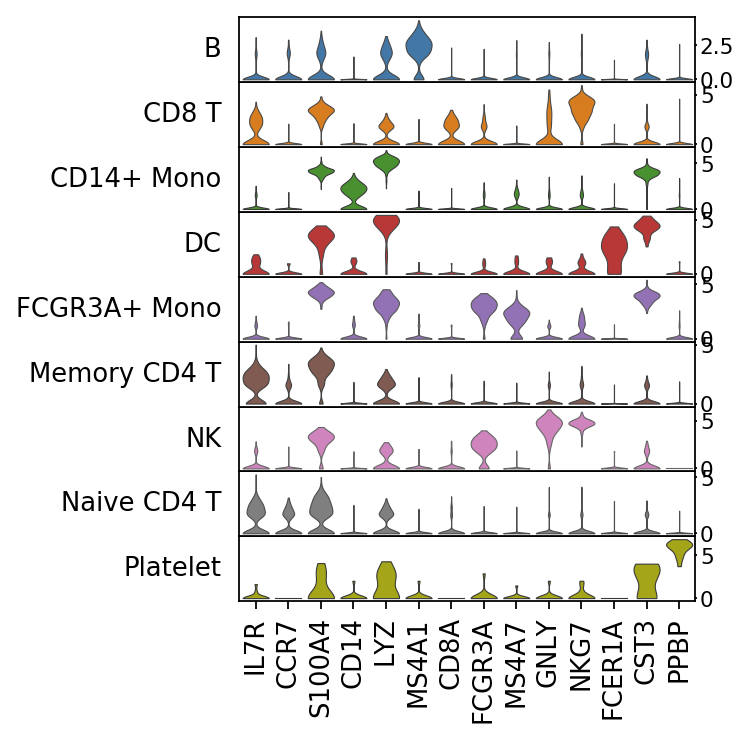

In [ ]:
# 列表形式
#List format
ax = sc.pl.stacked_violin(ann, var_names =  marker_genes, groupby='bulk_labels', row_palette=cluster_color)

In [ ]:
?sc.pl.stacked_violin

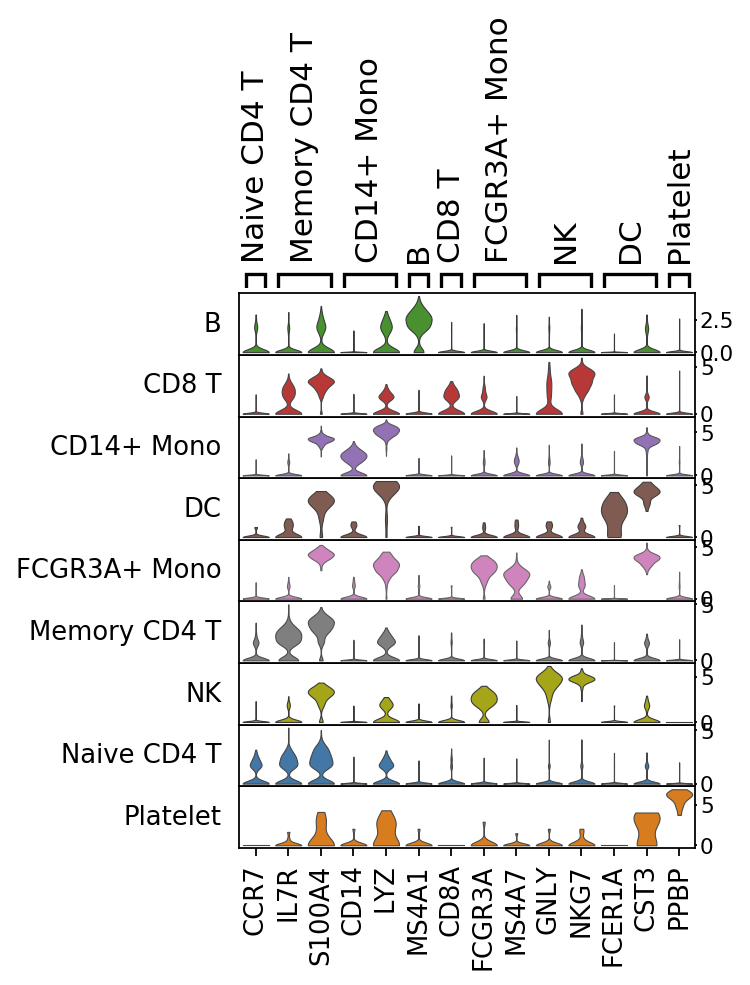

In [ ]:
# 字典形式
#Dictionary format
ax = sc.pl.stacked_violin(ann, var_names = marker_genes_dict , groupby='bulk_labels', row_palette=cluster_color)

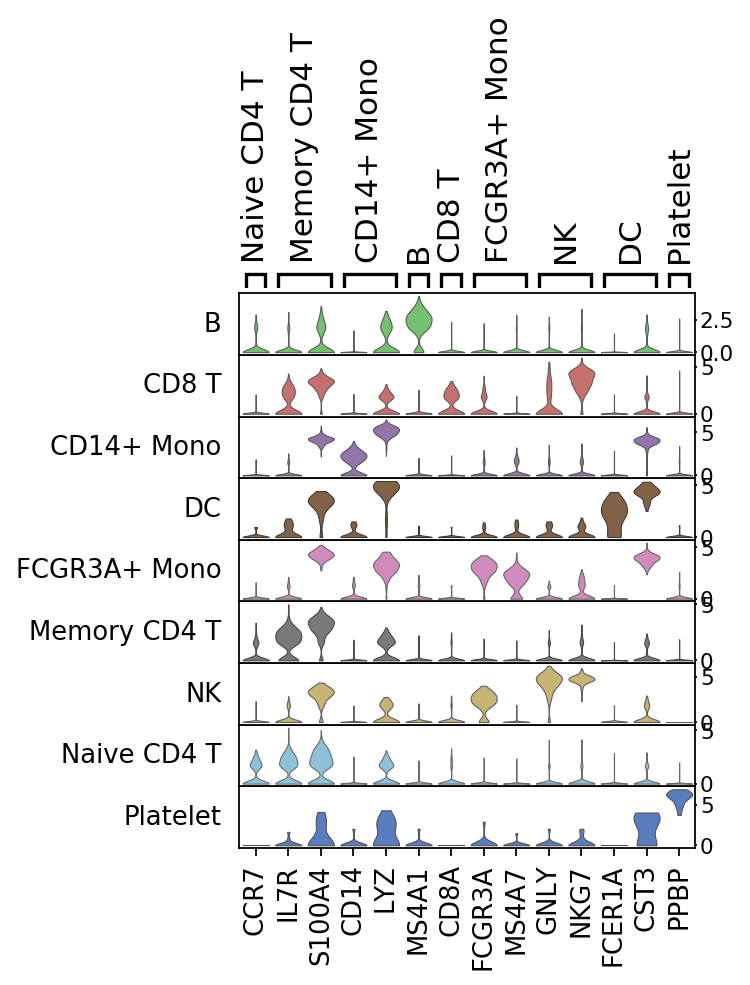

In [ ]:
# 保存, 默认输出在Figures下
#Save, default output under Figures
ax = sc.pl.stacked_violin(ann, var_names = marker_genes_dict , groupby='bulk_labels', save="stacked_violin.pdf")

### Dot plots

点图中，点的**大小**表示有多少比例的细胞表达该基因， 点的**颜色**表示该基因的**平均表达量**

可以调整的参数如下:

- dendrogram: True 或 False, 如果是True 表示要将分组进行重排，以树状图的形式展示（其实没啥必要）
- dot_max: 最多是50%的细胞表达基因
- dot_min: 最多是30%的细胞表达基因
- standard_scale: 标准到0-1

可以用`?sc.pl.dotplot`查看更多参数

### Dot plots
In the dot plot, the * * size * * of the dot represents the proportion of cells expressing the gene, and the * * color * * of the dot represents the * * average expression level of the gene**
The adjustable parameters are as follows:
-Dendrogram: True or False. If True, it means that the grouping needs to be rearranged and displayed in the form of a tree diagram (which is actually not necessary)
-Dot_max: up to 50% of cells express genes
-Dot_min: up to 30% of cells express genes
-Standard_Scale: Standard to 0-1
Can it be used? Sc. pl. dotplot ` View more parameters

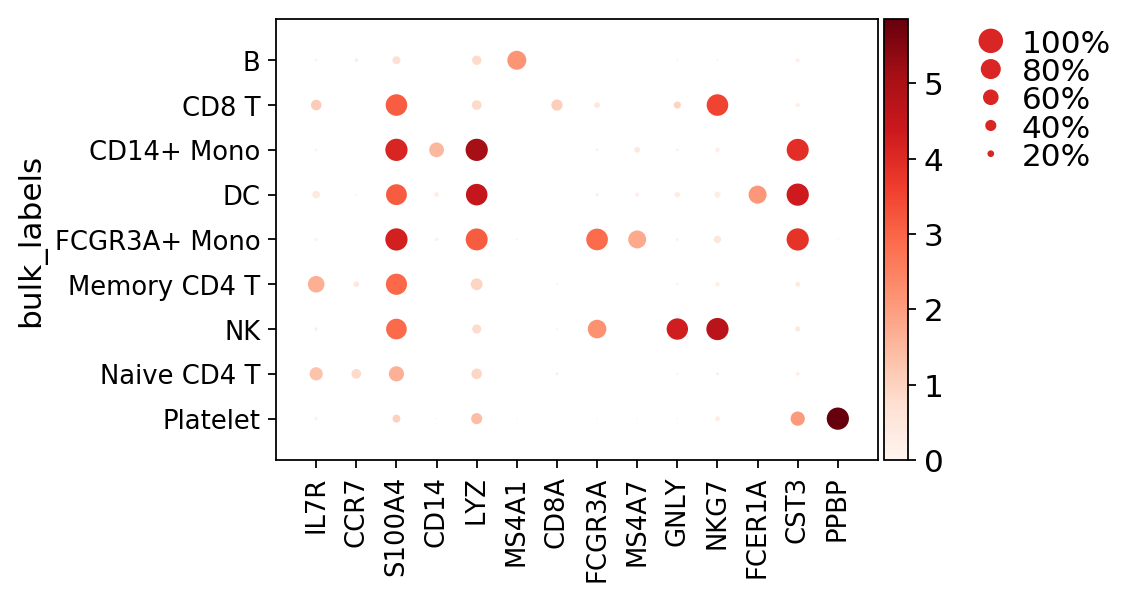

In [ ]:
# 列表形式
#List format
ax = sc.pl.dotplot(ann, var_names = marker_genes, groupby='bulk_labels')

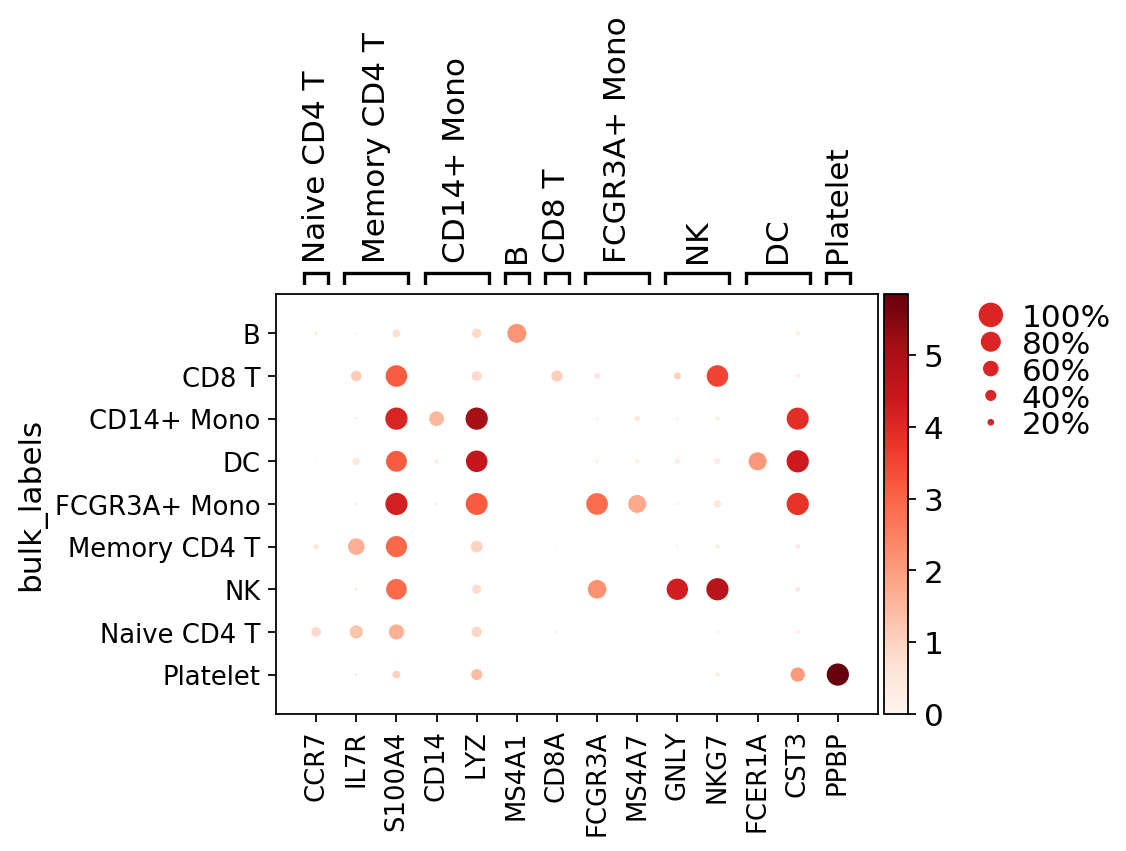

In [ ]:
# 字典形式
#Dictionary format
ax = sc.pl.dotplot(ann,marker_genes_dict, groupby='bulk_labels')

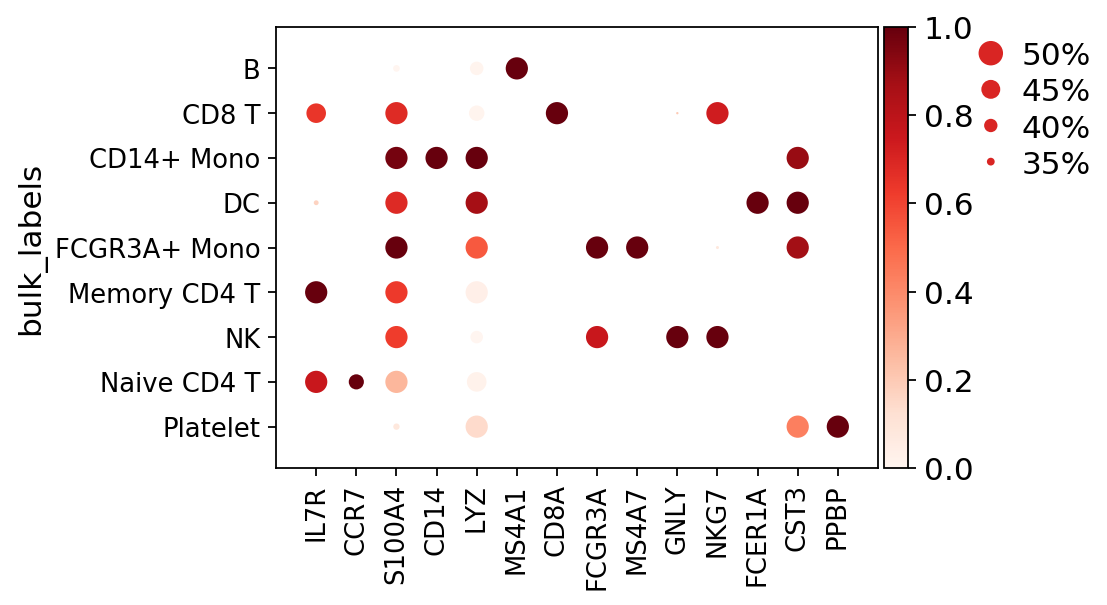

In [ ]:
# 换个参数
#Change the parameter
ax = sc.pl.dotplot(ann,marker_genes, groupby='bulk_labels',dot_max=0.5, dot_min=0.3, standard_scale='var')

### Matrix Plots

展示标记基因在不同细胞类群里的平均表达量，个人感觉没有点图的信息量大

### Matrix Plots
Displaying the average expression levels of marker genes in different cell groups, I personally feel that there is a lot of information without a dot plot

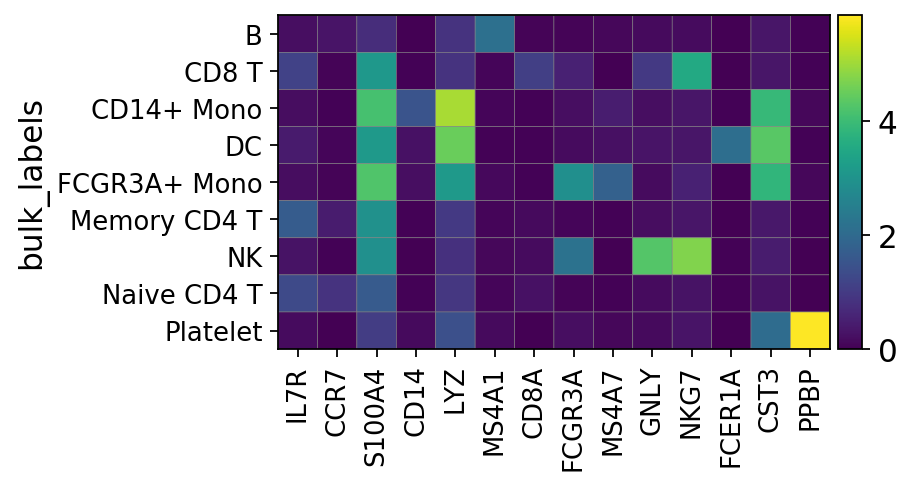

In [ ]:
gs = sc.pl.matrixplot(ann,marker_genes, groupby='bulk_labels')

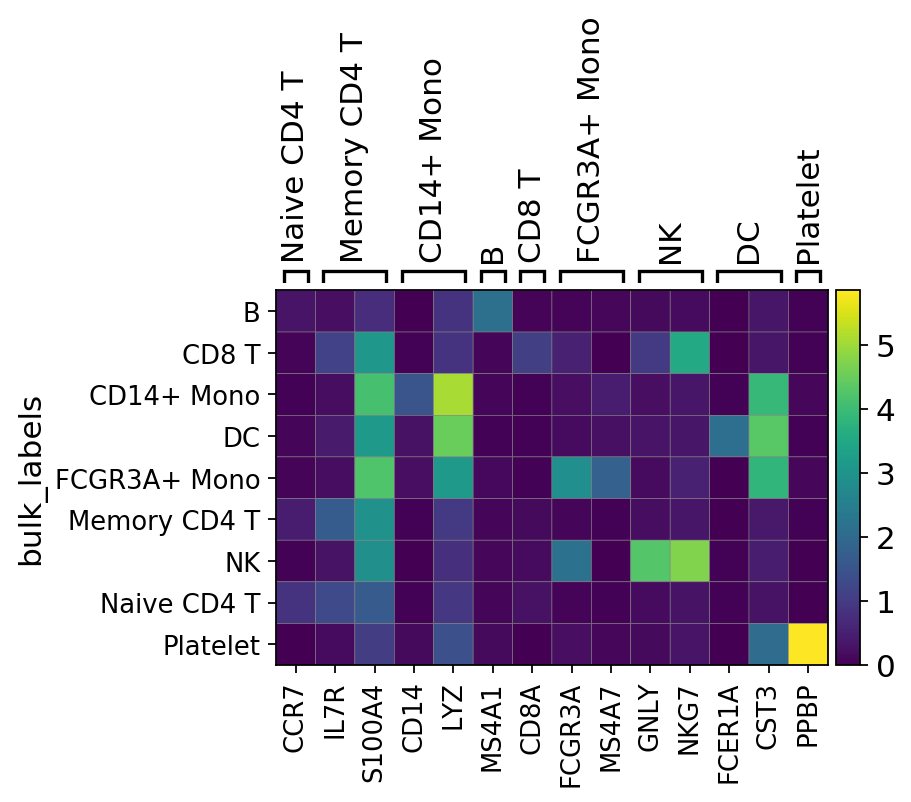

In [ ]:
# 字典形式
#Dictionary format
gs = sc.pl.matrixplot(ann,marker_genes_dict, groupby='bulk_labels')

### Heatmaps

相对于之前的Matrix plots, 不是展示均值，而是每个细胞的表达量

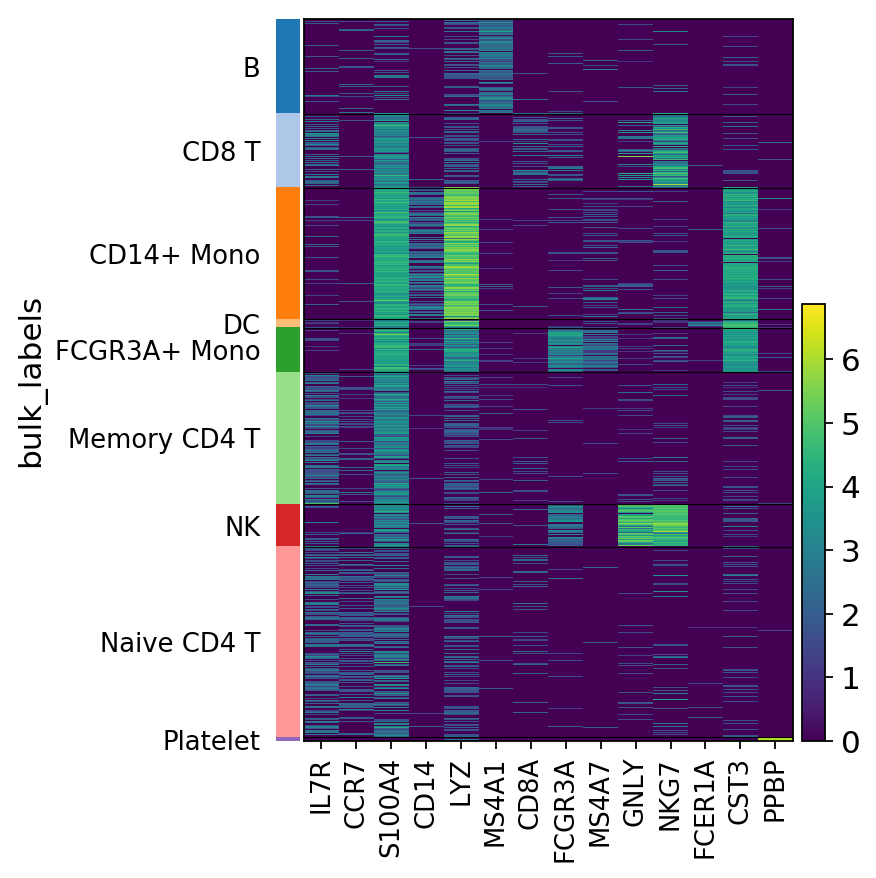

In [ ]:
# 列表形式
#List format
ax = sc.pl.heatmap(ann,marker_genes, groupby='bulk_labels')

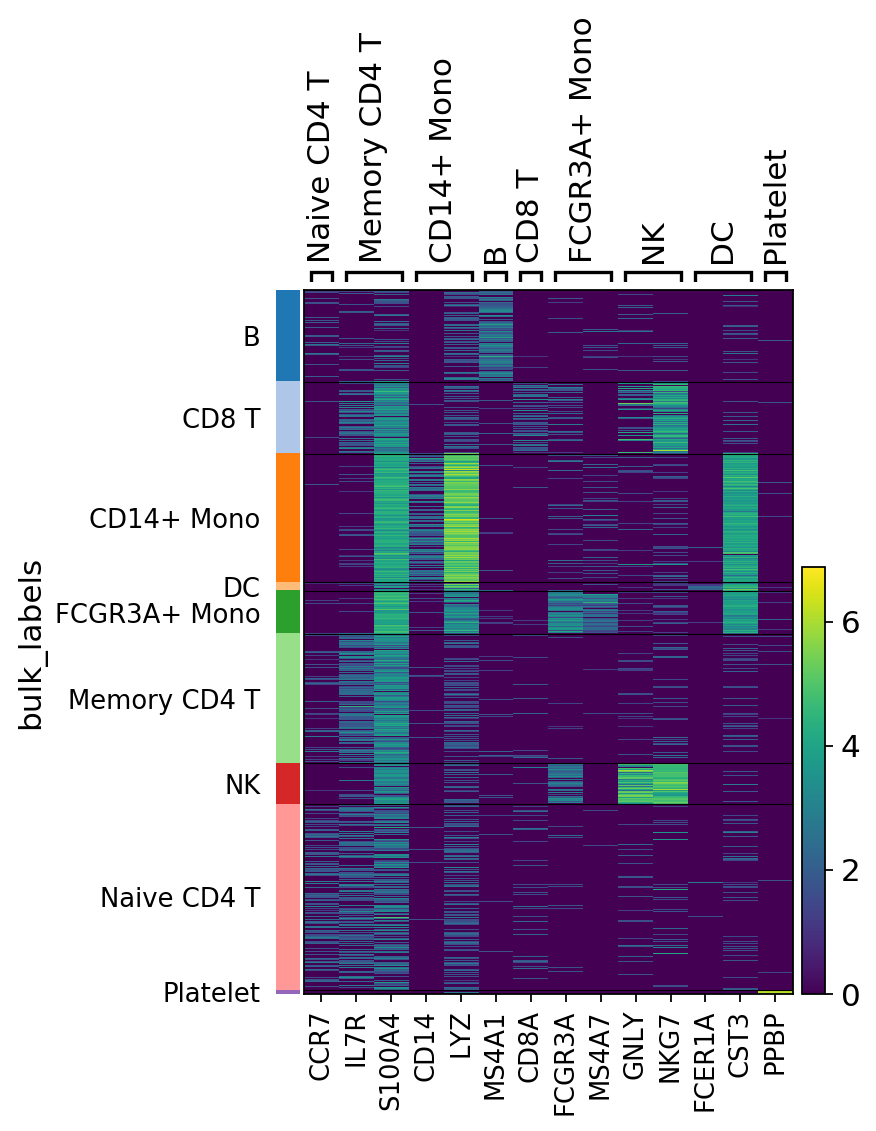

In [ ]:
# 字典形式
#Dictionary format
ax = sc.pl.heatmap(ann,marker_genes_dict, groupby='bulk_labels')

### Tracksplots

Tracksplots和Heatmap展现信息一样，但是通过高度的方法展现表达量
Tracksplots and Heatmap display information in the same way, but show expression levels through a high-level approach

In [ ]:
import numpy as np
ad = ann.copy()
ad.X.data = np.exp(ad.X.data)

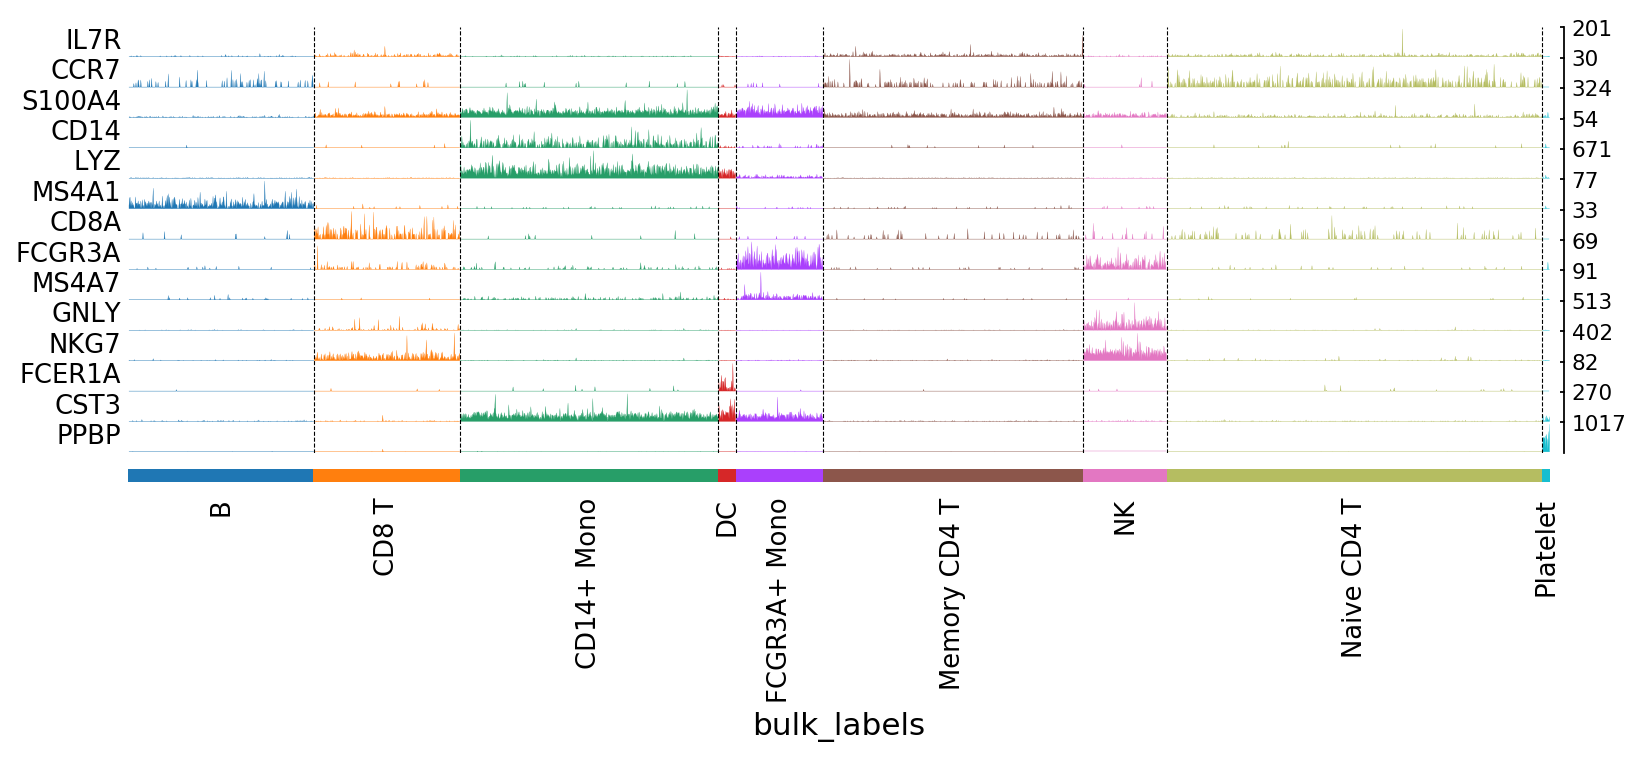

In [ ]:
ax = sc.pl.tracksplot(ad,marker_genes, groupby='bulk_labels',row_palette=cluster_color)

## 参考资料
##Reference materials
https://scanpy-tutorials.readthedocs.io/en/latest/visualizing-marker-genes.htm

In [ ]:
import IPython
print(IPython.sys_info())

!jupyter nbconvert --to html FigureYa111markerGene_step2_win10.ipynb

{'commit_hash': 'd774f565b',
 'commit_source': 'installation',
 'default_encoding': 'UTF-8',
 'ipython_path': '/anaconda3/lib/python3.7/site-packages/IPython',
 'ipython_version': '7.4.0',
 'os_name': 'posix',
 'platform': 'Darwin-18.2.0-x86_64-i386-64bit',
 'sys_executable': '/anaconda3/bin/python',
 'sys_platform': 'darwin',
 'sys_version': '3.7.3 (default, Mar 27 2019, 16:54:48) \n'
                '[Clang 4.0.1 (tags/RELEASE_401/final)]'}
[NbConvertApp] Converting notebook FigureYa111markerGene_step2_win10.ipynb to html
[NbConvertApp] Writing 1699605 bytes to FigureYa111markerGene_step2_win10.html
